# Pseudo Cross Validation
In this notebook the pseudo-cross-validation is run, scores are reported and plots are generated.

In [1]:
import pandas as pd

from model_utils import BestConfig, ModelFactory
from utils import evaluate_model_cv, plot_forecasts_fancy


from sklearn.preprocessing import OneHotEncoder
from darts.dataprocessing.transformers import StaticCovariatesTransformer

import sys
sys.path.append('externals/respinow_ml')# Fixes importing issues in external modules
from externals.respinow_ml.src.load_data import *
from externals.respinow_ml.src.plot_functions import prepare_plot_data

### Load Data

In [2]:
# Load data
ts_names = ['survstat', 'icosari', 'agi', 'cvn']
ts = load_data(ts_names)

# Create static covariates
ts.static_covariates.drop(columns=['source', 'target'], inplace=True)

covariates_transformer = StaticCovariatesTransformer(transformer_cat=OneHotEncoder())
ts = covariates_transformer.fit_transform(ts)

# Get Targets
train_end = pd.Timestamp('2018-09-30')
validation_start = pd.Timestamp('2018-10-07')
validation_end = pd.Timestamp('2019-09-29')
test_start = pd.Timestamp('2019-10-06')
test_end = pd.Timestamp('2020-09-27')

TARGETS = [t for t in ts.columns if 'survstat-influenza' in t]  # The 19 time series we want to predict

# Perform cross validation generation here
#targets, covariates = target_covariate_split(ts, TARGETS)

### Train and Evaluate Models

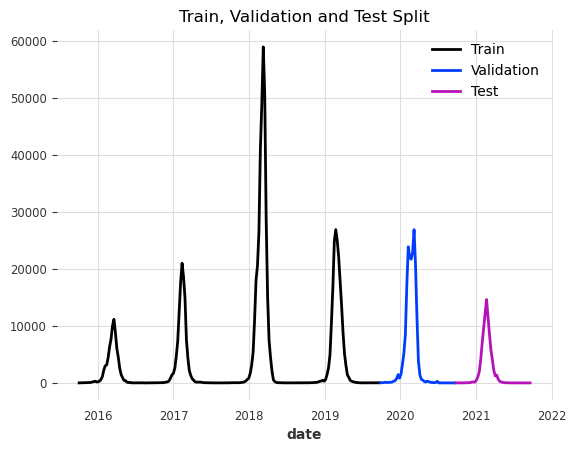

/home/feik/.conda/envs/tsmixer/lib/python3.11/site-packages/torch/cuda/__init__.py:619: UserWarning: Can't initialize NVML
/home/feik/.conda/envs/tsmixer/lib/python3.11/site-packages/torch/random.py:166: UserWarning: CUDA reports that you have 2 available devices, and you have used fork_rng without explicitly specifying which devices are being used. For safety, we initialize *every* CUDA device by default, which can be quite slow if you have a lot of CUDAs. If you know that you are only making use of a few CUDA devices, set the environment variable CUDA_VISIBLE_DEVICES or the 'devices' keyword argument of fork_rng with the set of devices you are actually using. For example, if you are using CPU only, set device.upper()_VISIBLE_DEVICES= or devices=[]; if you are using device 0 only, set CUDA_VISIBLE_DEVICES=0 or devices=[0].  To initialize all devices and suppress this warning, set the 'devices' keyword argument to `range(torch.cuda.device_count())`.
GPU available: True (cuda), used: Tr

Training: 0it [00:00, ?it/s]

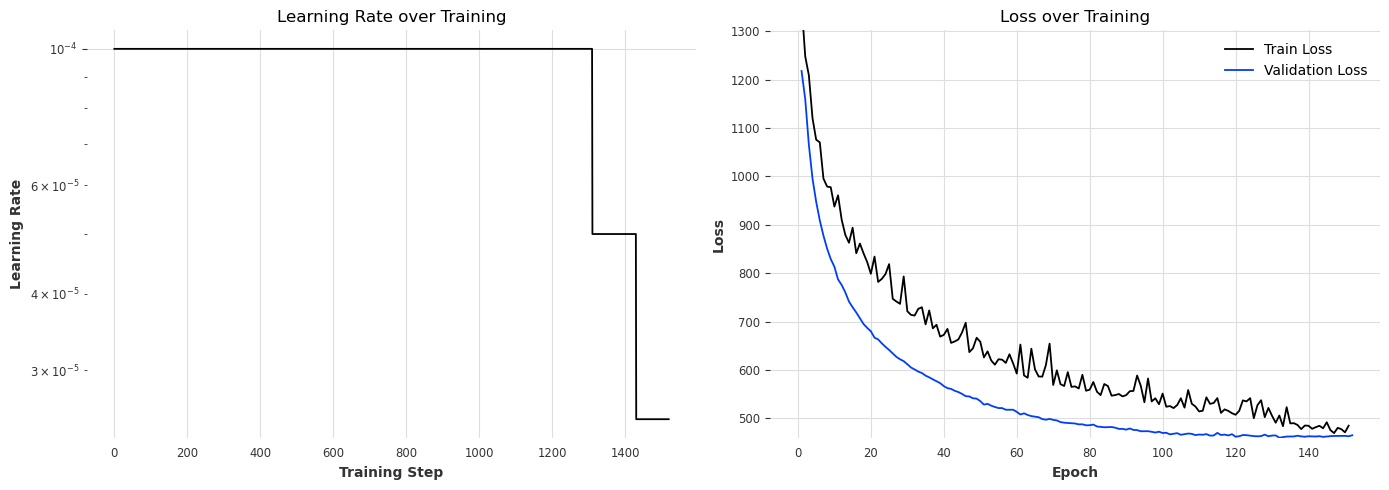

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Predicting: 0it [00:00, ?it/s]

                           NLinear + QR Evaluation Metrics                           
┏━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃ Metric          ┃            National ┃               State ┃                 Age ┃
┡━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ Wis             │  1838.2112154758072 │  313.15587783858894 │   343.4070502674368 │
│ Spread          │  169.90239900156675 │   38.35190948088271 │   45.58964755590568 │
│ Overprediction  │  1667.8506706913704 │  274.67877392373765 │   297.6644283883531 │
│ Underprediction │ 0.45814578286986235 │ 0.12519443396858299 │ 0.15297432317798876 │
│ C50             │  0.1989795918367347 │  0.3968850698174006 │ 0.34098639455782315 │
│ C95             │ 0.40816326530612246 │  0.6452738990332976 │  0.6232993197278912 │
└─────────────────┴─────────────────────┴─────────────────────┴─────────────────────┘

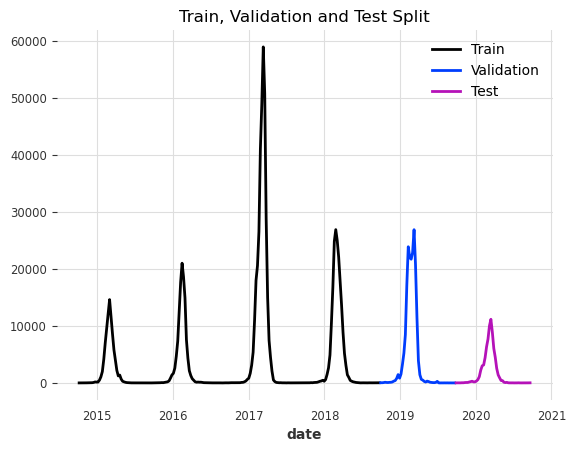

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Training: 0it [00:00, ?it/s]

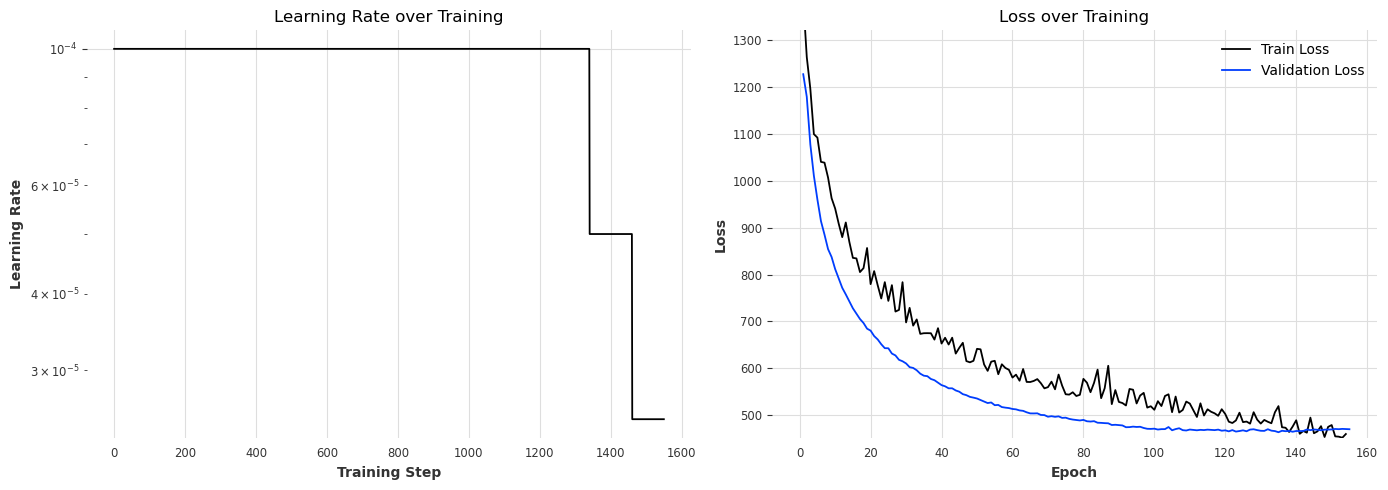

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Predicting: 0it [00:00, ?it/s]

                          NLinear + QR Evaluation Metrics                          
┏━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓
┃ Metric          ┃           National ┃               State ┃                Age ┃
┡━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩
│ Wis             │ 1664.0239169831023 │   250.1833019482156 │ 249.14734346091635 │
│ Spread          │  131.0955081653931 │  30.783804506141625 │ 36.517830671900285 │
│ Overprediction  │  79.66782000904766 │  24.707959950647247 │ 27.592505467644944 │
│ Underprediction │ 1453.2605888086614 │  194.69153749142674 │ 185.03700732137114 │
│ C50             │  0.413265306122449 │ 0.46643394199785176 │ 0.4812925170068027 │
│ C95             │ 0.7704081632653061 │   0.826530612244898 │ 0.8324829931972789 │
└─────────────────┴────────────────────┴─────────────────────┴────────────────────┘

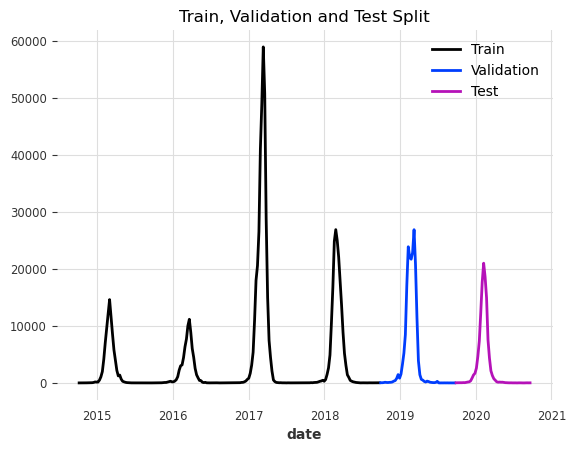

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Training: 0it [00:00, ?it/s]

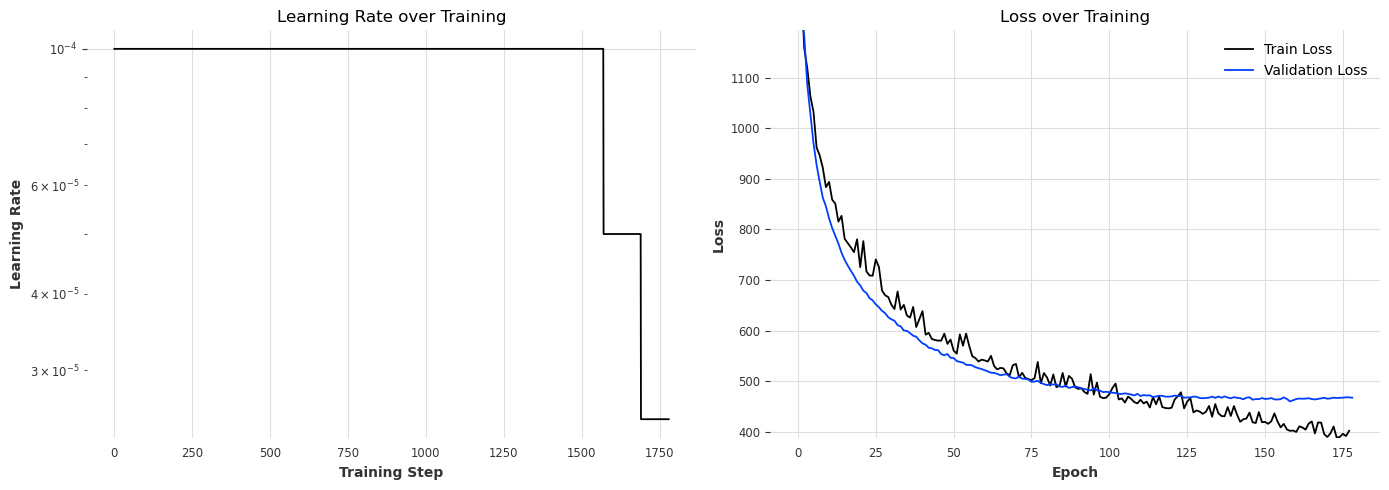

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Predicting: 0it [00:00, ?it/s]

                          NLinear + QR Evaluation Metrics                          
┏━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃ Metric          ┃           National ┃              State ┃                 Age ┃
┡━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ Wis             │ 1022.2734193197871 │ 186.26026091714326 │  193.81072079882466 │
│ Spread          │ 195.59892146420466 │  44.32711802689924 │   51.84148393457185 │
│ Overprediction  │  31.94652575447683 │  22.81123663730257 │  23.133827578237913 │
│ Underprediction │  794.7279721011056 │ 119.12190625294146 │   118.8354092860149 │
│ C50             │  0.413265306122449 │ 0.5265843179377014 │ 0.47278911564625853 │
│ C95             │ 0.9285714285714286 │ 0.9280343716433942 │  0.9379251700680272 │
└─────────────────┴────────────────────┴────────────────────┴─────────────────────┘

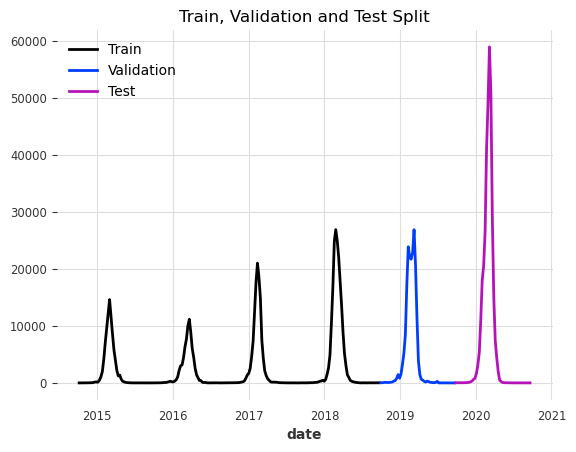

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Training: 0it [00:00, ?it/s]

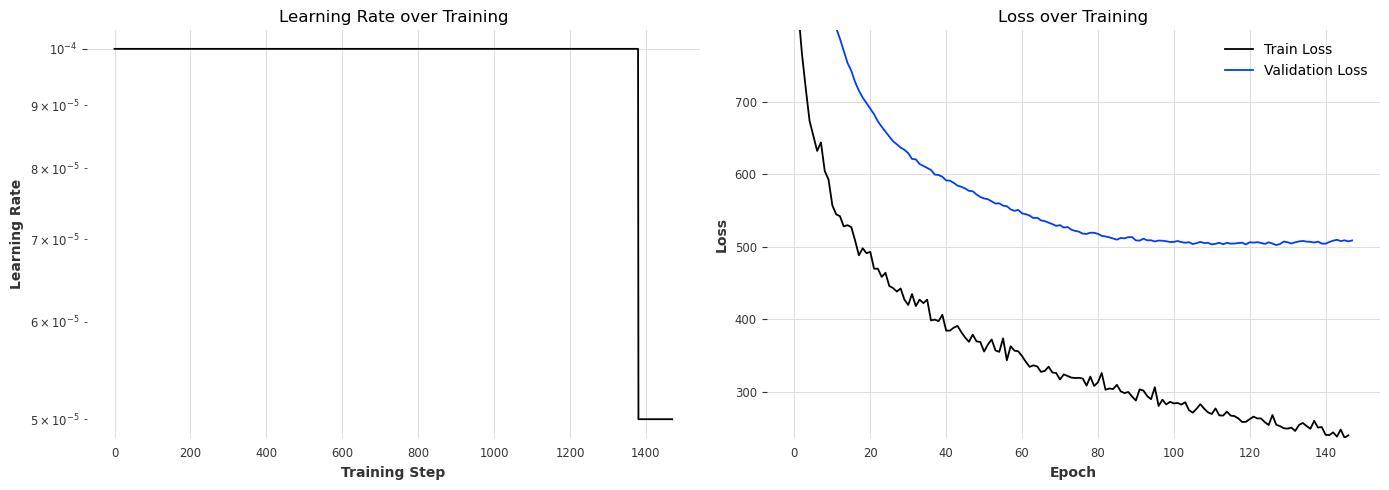

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Predicting: 0it [00:00, ?it/s]

                         NLinear + QR Evaluation Metrics                          
┏━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓
┃ Metric          ┃           National ┃              State ┃                Age ┃
┡━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩
│ Wis             │ 1470.8302224928025 │ 290.05713591390213 │ 315.07955904578955 │
│ Spread          │  520.7541150183783 │  85.18083693624743 │  94.61411584725039 │
│ Overprediction  │  642.1387112138055 │  165.4723717665808 │  189.1989696535125 │
│ Underprediction │ 307.93739626061847 │  39.40392721107388 │ 31.266473545026642 │
│ C50             │ 0.4336734693877551 │ 0.5241675617615468 │ 0.5348639455782312 │
│ C95             │ 0.8673469387755102 │ 0.8633190118152524 │ 0.8835034013605442 │
└─────────────────┴────────────────────┴────────────────────┴────────────────────┘

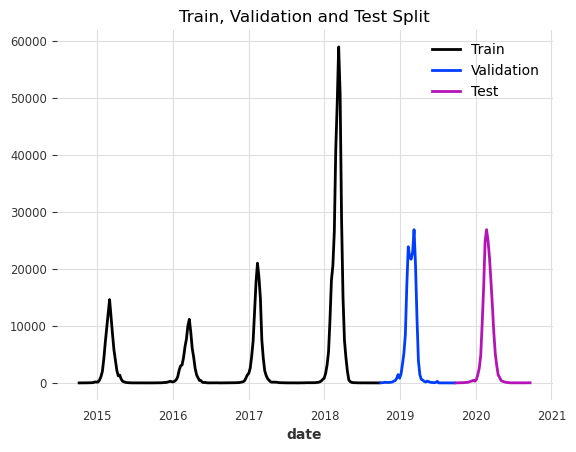

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Training: 0it [00:00, ?it/s]

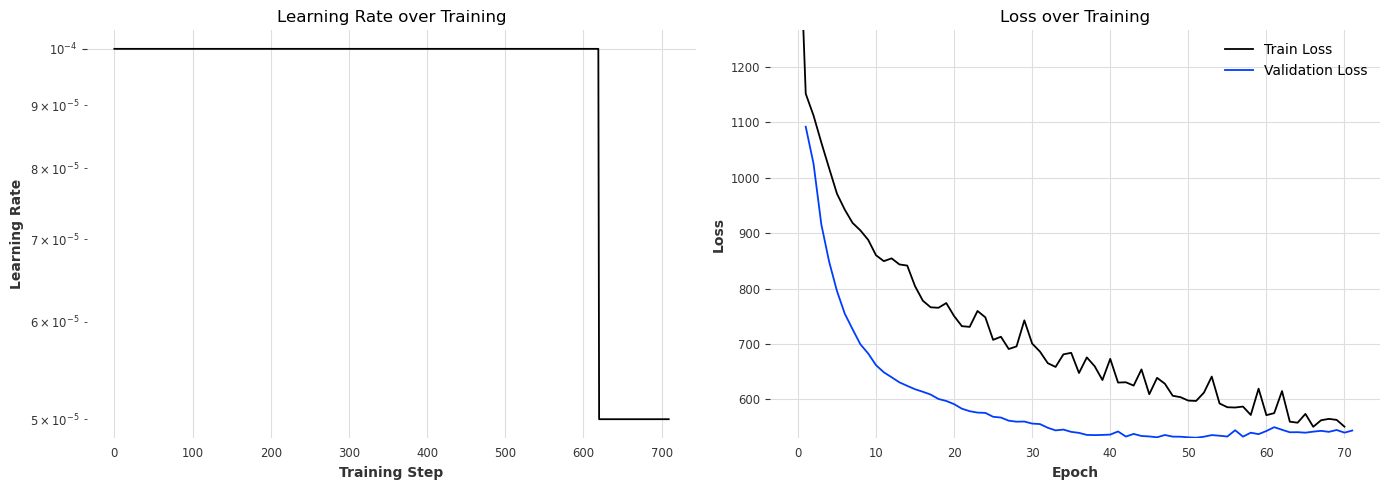

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Predicting: 0it [00:00, ?it/s]

                          NLinear + QR Evaluation Metrics                          
┏━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓
┃ Metric          ┃            National ┃              State ┃                Age ┃
┡━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩
│ Wis             │  1832.2924505207193 │ 220.10676722095067 │ 178.29286381846495 │
│ Spread          │   248.5361001976956 │  75.03908117514878 │  94.66731363415461 │
│ Overprediction  │   99.45524363038714 │  33.56355590713858 │  33.17088442888679 │
│ Underprediction │  1484.3011066926365 │  111.5041301386633 │  50.45466575542357 │
│ C50             │ 0.46938775510204084 │ 0.5974758324382384 │ 0.6062925170068028 │
│ C95             │  0.7653061224489796 │  0.924812030075188 │ 0.9362244897959183 │
└─────────────────┴─────────────────────┴────────────────────┴────────────────────┘

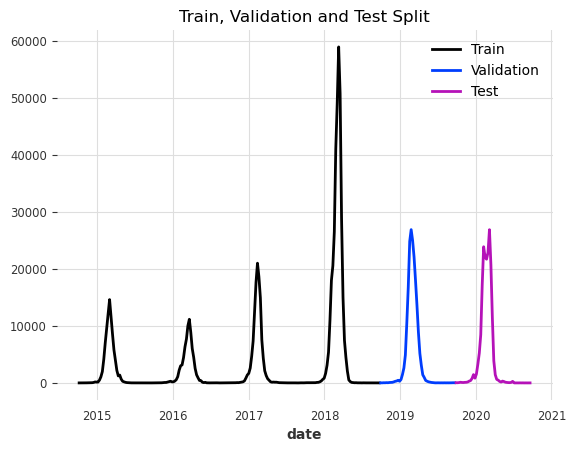

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Training: 0it [00:00, ?it/s]

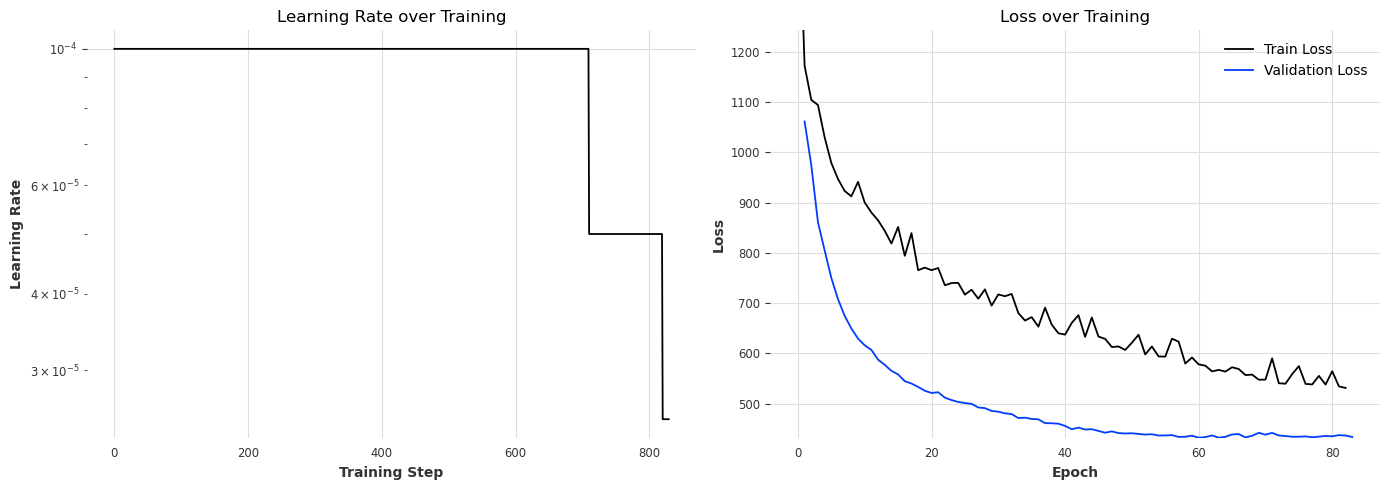

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Predicting: 0it [00:00, ?it/s]

                          NLinear + QR Evaluation Metrics                          
┏━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓
┃ Metric          ┃            National ┃              State ┃                Age ┃
┡━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩
│ Wis             │  1412.2557588246964 │  197.1099138267131 │ 170.99710459393577 │
│ Spread          │  284.65339625982415 │  74.56687437468243 │  90.93455723286068 │
│ Overprediction  │  105.23278667729024 │  40.02951245298487 │  36.64207061646196 │
│ Underprediction │  1022.3695758875821 │   82.5135269990458 │  43.42047674461315 │
│ C50             │ 0.49489795918367346 │  0.614124597207304 │ 0.6224489795918368 │
│ C95             │  0.7551020408163265 │ 0.9213211600429646 │ 0.9481292517006803 │
└─────────────────┴─────────────────────┴────────────────────┴────────────────────┘

In [3]:
config = BestConfig()
mfactory = ModelFactory(model_kwargs=config.nlinear_config, fixed_kwargs=config.fixed_config)
dfs = evaluate_model_cv(mfactory, ts, end=test_end, targets_names=TARGETS)

### Save Aggregated Results

In [11]:
df_list = []
for i in range(len(dfs["scores"])):
    n = pd.DataFrame(dfs["scores"][i]["national"])
    s = pd.DataFrame(dfs["scores"][i]["state"])
    a = pd.DataFrame(dfs["scores"][i]["age"])
    for j, name in zip([n, s, a], ["national", "state", "age"]):
        j.columns = [f"{col}_{name}" for col in j.columns]
    df_list.append(pd.concat([n, s, a], axis=1))
df = pd.concat(df_list)

model_name = mfactory.name
df.drop(["model_national", "model_state", "model_age"], inplace=True, axis=1)
agg = df.aggregate(["mean", "std"])
agg["model"] = model_name
agg.reset_index(inplace=True)
agg.rename(columns={"index": "aggregation"}, inplace=True)
full_df = pd.read_csv("results/results_cv.csv")
full_df = pd.concat([full_df, agg], axis=0)
full_df.to_csv("results/results_cv.csv", index=False)

### Save Detailed Results

In [12]:
df["fold"] = range(len(dfs["scores"]))
df["model"] = model_name
full_df = pd.read_csv("results/results_cv_detailed.csv")
full_df = pd.concat([full_df, df], axis=0)
full_df.to_csv("results/results_cv_detailed.csv", index=False)

### Latex Tables
#### For Aggregated Dataframes

In [20]:
df = pd.read_csv("results/results_cv.csv")
mapping = {
    'national': ['spread_national', 'overprediction_national', 'underprediction_national', 'wis_national', 'c50_national', 'c95_national'],
    'state': ['spread_state', 'overprediction_state', 'underprediction_state', 'wis_state', 'c50_state', 'c95_state'],
    'age': ['spread_age', 'overprediction_age', 'underprediction_age', 'wis_age', 'c50_age', 'c95_age']
}
# Melt the DataFrame
df_long = pd.melt(df, id_vars=['aggregation', 'model'], value_vars=[col for sublist in mapping.values() for col in sublist], 
                  var_name='variable', value_name='value')
# Map the 'variable' to 'stratum'
df_long['stratum'] = df_long['variable'].map(
    lambda x: 'national' if 'national' in x else ('state' if 'state' in x else 'age')
)
# Replace the 'variable' column values to remove the '_national', '_state', '_age' suffixes
df_long['variable'] = df_long['variable'].str.replace('_national', '').str.replace('_state', '').str.replace('_age', '')
# Pivot the DataFrame back to the desired format
df_final = df_long.pivot_table(index=['aggregation', 'model', 'stratum'], columns='variable', values='value').reset_index()
df = df_final

df["c50"] = (df["c50"]*100)
df["c95"] = (df["c95"]*100)
df = df.round(1)

In [21]:
# Begin tablular environment
print("\\begin{tabular}{llrrr}")
# Print the toprule
print("\\toprule")
# Print the first row
print("\\multicolumn{2}{c}{\\textbf{model}} & \multicolumn{1}{c}{\\textbf{WIS}} & \multicolumn{1}{c}{\\textbf{c50}} & \multicolumn{1}{c}{\\textbf{c95}} \\\\")
# Iterate over the rows of the df
stratum_list = ["national", "state", "age"]
for stratum in stratum_list:
    print("\\midrule")
    print("\\multirow{6}{*}{\\rotatebox[origin=c]{90}{\\textit{" + stratum + "}}}")
    # For each model: & NLinear & $1531 \pm 733$ & $0.28 \pm 0.10$ & $0.78 \pm 0.11$ \\
    for model in ["NLinear + QR", "DLinear + QR", "TSMixer + QR", "TFT + QR", "TSMixer + NB", "TFT + NB"]:
        rows = df[(df["model"] == model) & (df["stratum"] == stratum)]
        print("& " + model + " & $" + str(rows["wis"].values[0]) + " \pm " + str(rows["wis"].values[1]) + "$ & $" + str(rows["c50"].values[0]) + " \pm " + str(rows["c50"].values[1]) + "$ & $" + str(rows["c95"].values[0]) + " \pm " + str(rows["c95"].values[1]) + "$ \\\\")

# End tabular environment
print("\\bottomrule")
print("\\end{tabular}")

\begin{tabular}{llrrr}
\toprule
\multicolumn{2}{c}{\textbf{model}} & \multicolumn{1}{c}{\textbf{WIS}} & \multicolumn{1}{c}{\textbf{c50}} & \multicolumn{1}{c}{\textbf{c95}} \\
\midrule
\multirow{4}{*}{\rotatebox[origin=c]{90}{\textit{national}}}
& NLinear + QR & $1520.6 \pm 300.2$ & $38.4 \pm 10.3$ & $74.4 \pm 20.0$ \\
& DLinear + QR & $1455.8 \pm 222.0$ & $42.9 \pm 5.8$ & $81.6 \pm 5.8$ \\
& TSMixer + QR & $954.7 \pm 219.5$ & $66.5 \pm 11.9$ & $95.0 \pm 5.2$ \\
& TFT + QR & $1003.4 \pm 102.1$ & $71.6 \pm 6.5$ & $96.1 \pm 3.6$ \\
& TSMixer + NB & $899.8 \pm 366.0$ & $41.5 \pm 8.5$ & $80.7 \pm 7.6$ \\
& TFT + NB & $1274.7 \pm 221.4$ & $24.7 \pm 8.9$ & $62.9 \pm 9.5$ \\
\midrule
\multirow{4}{*}{\rotatebox[origin=c]{90}{\textit{state}}}
& NLinear + QR & $249.9 \pm 55.6$ & $50.1 \pm 8.6$ & $83.1 \pm 12.3$ \\
& DLinear + QR & $226.4 \pm 40.3$ & $53.8 \pm 8.0$ & $89.7 \pm 4.8$ \\
& TSMixer + QR & $171.3 \pm 19.6$ & $63.6 \pm 9.3$ & $93.3 \pm 4.6$ \\
& TFT + QR & $182.4 \pm 15.6$ & $69.6 \pm 5

#### For Detailed Dataframes

In [22]:
df = pd.read_csv("results/results_cv_detailed.csv")
mapping = {
    'national': ['spread_national', 'overprediction_national', 'underprediction_national', 'wis_national', 'c50_national', 'c95_national'],
    'state': ['spread_state', 'overprediction_state', 'underprediction_state', 'wis_state', 'c50_state', 'c95_state'],
    'age': ['spread_age', 'overprediction_age', 'underprediction_age', 'wis_age', 'c50_age', 'c95_age']
}
# Melt the DataFrame
df_long = pd.melt(df, id_vars=['model', 'fold'], value_vars=[col for sublist in mapping.values() for col in sublist], 
                  var_name='variable', value_name='value')
# Map the 'variable' to 'stratum'
df_long['stratum'] = df_long['variable'].map(
    lambda x: 'national' if 'national' in x else ('state' if 'state' in x else 'age')
)
# Replace the 'variable' column values to remove the '_national', '_state', '_age' suffixes
df_long['variable'] = df_long['variable'].str.replace('_national', '').str.replace('_state', '').str.replace('_age', '')
# Pivot the DataFrame back to the desired format
df_final = df_long.pivot_table(index=['model', 'fold', 'stratum'], columns='variable', values='value').reset_index()
df = df_final

df["c50"] = (df["c50"]*100)
df["c95"] = (df["c95"]*100)
df = df.round(1)

In [24]:
df

variable,model,fold,stratum,c50,c95,overprediction,spread,underprediction,wis
0,DLinear + QR,0,age,25.8,66.1,286.8,37.8,0.1,324.7
1,DLinear + QR,0,national,14.3,45.9,1496.0,152.0,0.0,1648.1
2,DLinear + QR,0,state,30.1,67.5,260.1,32.6,0.1,292.8
3,DLinear + QR,1,age,43.4,85.8,20.9,33.7,194.4,249.0
4,DLinear + QR,1,national,34.7,74.0,69.2,137.4,1389.3,1595.9
...,...,...,...,...,...,...,...,...,...
103,TSMixer + QR,4,national,83.2,100.0,172.2,955.5,153.5,1281.2
104,TSMixer + QR,4,state,75.3,99.2,21.5,123.8,51.0,196.4
105,TSMixer + QR,5,age,66.8,96.7,52.6,65.7,59.1,177.4
106,TSMixer + QR,5,national,74.0,98.0,226.4,358.6,177.6,762.7


In [26]:
# Begin tablular environment
print("\\begin{longtable}{lllrrrrrr}")
# Print the toprule
print("\\toprule")
# Print the first row
print("\\multicolumn{3}{c}{\\textbf{model}} & \multicolumn{1}{c}{\\textbf{WIS}} & \multicolumn{1}{c}{\\textbf{Over}} & \multicolumn{1}{c}{\\textbf{Under}} & \multicolumn{1}{c}{\\textbf{Spread}} & \multicolumn{1}{c}{\\textbf{c50}} & \multicolumn{1}{c}{\\textbf{c95}} \\\\")
print("\\midrule")
print("\\endhead")
# Iterate over the rows of the df
stratum_list = ["national", "state", "age"]
model_list = ["NLinear + QR", "DLinear + QR", "TSMixer + QR", "TFT + QR", "TSMixer + NB", "TFT + NB"]
fold_list = df["fold"].unique()
firstline = True
for fold in df["fold"].unique():
    if not firstline: print("\\midrule")
    firstline = False
    print("\\multirow{"+str(len(model_list)*len(stratum_list))+"}{*}{\\rotatebox[origin=c]{90}{\\textit{fold " + str(fold) + "}}}")
    for stratum in stratum_list:
        print("&\\multirow{"+str(len(model_list))+"}{*}{\\rotatebox[origin=c]{90}{\\textit{" + str(stratum) + "}}}")
        # For each model: & NLinear & $1531 \pm 733$ & $0.28 \pm 0.10$ & $0.78 \pm 0.11$ \\
        first = True
        for model in model_list:
            rows = df[(df["model"] == model) & (df["stratum"] == stratum) & (df["fold"] == fold)]
            align = "&" if first else "&&"
            first = False
            print(align + model +
                  " & $" + str(rows["wis"].values[0]) +
                  "$ & $" + str(rows["overprediction"].values[0]) +
                  "$ & $" + str(rows["underprediction"].values[0]) +
                  "$ & $" + str(rows["spread"].values[0]) +
                  "$ & $" + str(rows["c50"].values[0]) +
                  "$ & $" + str(rows["c95"].values[0]) +
                  "$ \\\\")

# End tabular environment
print("\\bottomrule")
print("\\caption[Detailed results of the pseudo cross validation]{Detailed results of the pseudo cross validation.}")
print("\\label{tab:cv_detailed}")
print("\\end{longtable}")

\begin{longtable}{lllrrrrrr}
\toprule
\multicolumn{3}{c}{\textbf{model}} & \multicolumn{1}{c}{\textbf{WIS}} & \multicolumn{1}{c}{\textbf{Over}} & \multicolumn{1}{c}{\textbf{Under}} & \multicolumn{1}{c}{\textbf{Spread}} & \multicolumn{1}{c}{\textbf{c50}} & \multicolumn{1}{c}{\textbf{c95}} \\
\midrule
\endhead
\multirow{18}{*}{\rotatebox[origin=c]{90}{\textit{fold 0}}}
&\multirow{6}{*}{\rotatebox[origin=c]{90}{\textit{national}}}
&NLinear + QR & $1834.4$ & $1669.9$ & $0.4$ & $164.0$ & $21.4$ & $40.3$ \\
&&DLinear + QR & $1648.1$ & $1496.0$ & $0.0$ & $152.0$ & $14.3$ & $45.9$ \\
&&TSMixer + QR & $3908.2$ & $3273.1$ & $1.0$ & $634.1$ & $55.1$ & $74.0$ \\
&&TFT + QR & $1830.3$ & $1564.6$ & $1.7$ & $264.0$ & $52.6$ & $76.0$ \\
&&TSMixer + NB & $2232.9$ & $2067.5$ & $0.1$ & $165.3$ & $24.5$ & $49.0$ \\
&&TFT + NB & $2761.9$ & $2602.4$ & $0.1$ & $159.4$ & $23.5$ & $53.6$ \\
&\multirow{6}{*}{\rotatebox[origin=c]{90}{\textit{state}}}
&NLinear + QR & $314.7$ & $277.3$ & $0.1$ & $37.2$ & $37.8$ & 

#### LaTeX Table for Robust Results

In [ ]:
df_all = pd.read_csv("results/results_cv_detailed.csv")
mapping = {
'national': ['spread_national', 'overprediction_national', 'underprediction_national', 'wis_national', 'c50_national', 'c95_national'],
'state': ['spread_state', 'overprediction_state', 'underprediction_state', 'wis_state', 'c50_state', 'c95_state'],
'age': ['spread_age', 'overprediction_age', 'underprediction_age', 'wis_age', 'c50_age', 'c95_age']
}
# Melt the DataFrame
df_long = pd.melt(df_all, id_vars=['model', 'fold'], value_vars=[col for sublist in mapping.values() for col in sublist], 
                  var_name='variable', value_name='value')
# Map the 'variable' to 'stratum'
df_long['stratum'] = df_long['variable'].map(
    lambda x: 'national' if 'national' in x else ('state' if 'state' in x else 'age')
)
# Replace the 'variable' column values to remove the '_national', '_state', '_age' suffixes
df_long['variable'] = df_long['variable'].str.replace('_national', '').str.replace('_state', '').str.replace('_age', '')
# Pivot the DataFrame back to the desired format
df_final = df_long.pivot_table(index=['model', 'stratum', 'fold'], columns='variable', values='value').reset_index()
df_all = df_final

# Identify the worst fold for each model and stratum combination
worst_folds = df_all.loc[df_all.groupby(['model', 'stratum'])['wis'].idxmax()]

# Remove the worst folds from the DataFrame
df_all = df_all[~df_all.index.isin(worst_folds.index)]

df_all = df_all.drop("fold", axis=1)
# Group by 'model' and 'stratum' and calculate mean and standard deviation
mean_df = df_all.groupby(['model', 'stratum']).mean().reset_index()
std_df = df_all.groupby(['model', 'stratum']).std().reset_index()

# Merge the mean and standard deviation DataFrames
result_df = pd.merge(mean_df, std_df, on=['model', 'stratum'], suffixes=('_mean', '_std'))

# Display the result
result_df

In [ ]:
df = result_df.copy()
df["c50_mean"] = (df["c50_mean"]*100)
df["c95_mean"] = (df["c95_mean"]*100)
df["c50_std"] = (df["c50_std"]*100)
df["c95_std"] = (df["c95_std"]*100)
df = df.round(1)

# Begin tablular environment
print("\\begin{tabular}{llSSS}")
# Print the toprule
print("\\toprule")
# Print the first row
print("\\multicolumn{2}{c}{\\textbf{model}} & \multicolumn{1}{c}{\\textbf{WIS}} & \multicolumn{1}{c}{\\textbf{c50}} & \multicolumn{1}{c}{\\textbf{c95}} \\\\")
# Iterate over the rows of the df
stratum_list = ["national", "state", "age"]
for stratum in stratum_list:
    print("\\midrule")
    print("\\multirow{6}{*}{\\rotatebox[origin=c]{90}{\\textit{" + stratum + "}}}")
    # For each model: & NLinear & $1531 \pm 733$ & $0.28 \pm 0.10$ & $0.78 \pm 0.11$ \\
    for model in ["NLinear + QR", "DLinear + QR", "TSMixer + QR", "TFT + QR", "TSMixer + NB", "TFT + NB"]:
        rows = df[(df["model"] == model) & (df["stratum"] == stratum)]
        print("& " + model + " & " + str(rows["wis_mean"].values[0]) + " \pm " + str(rows["wis_std"].values[0]) + " & " + str(rows["c50_mean"].values[0]) + " \pm " + str(rows["c50_std"].values[0]) + " & " + str(rows["c95_mean"].values[0]) + " \pm " + str(rows["c95_std"].values[0]) + "\\\\")

# End tabular environment
print("\\bottomrule")
print("\\end{tabular}")

### Plots

In [ ]:
cv_series = dfs["cv_series"]
for df, (series, train_end) in zip(dfs["dfs"], cv_series):
    series = series[TARGETS]
    # TODO series still contains more info than just the Target
    # Is problem in the series? or in the df? (should be series since df only contains the predictions)
    # PROBLEM: series contains all the data, not just the target
    train, test = series.split_after(train_end)
    df_plot = prepare_plot_data(df, test)
    p = plot_forecasts_fancy(df_plot, 'national', confidence_interval=95, stride=1) # Startum can be 'states', 'age' or 'national'
    p.show()